In [1]:
# Import all libraries
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
# Load titanic dataset
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check information about dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(titanic_df.describe())


Descriptive Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
# Shape of the dataset
titanic_df.shape

(891, 12)

In [6]:
# get the number of missing data points per column
missing_values_count = titanic_df.isnull().sum()
# Look at the missing data
missing_values_count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

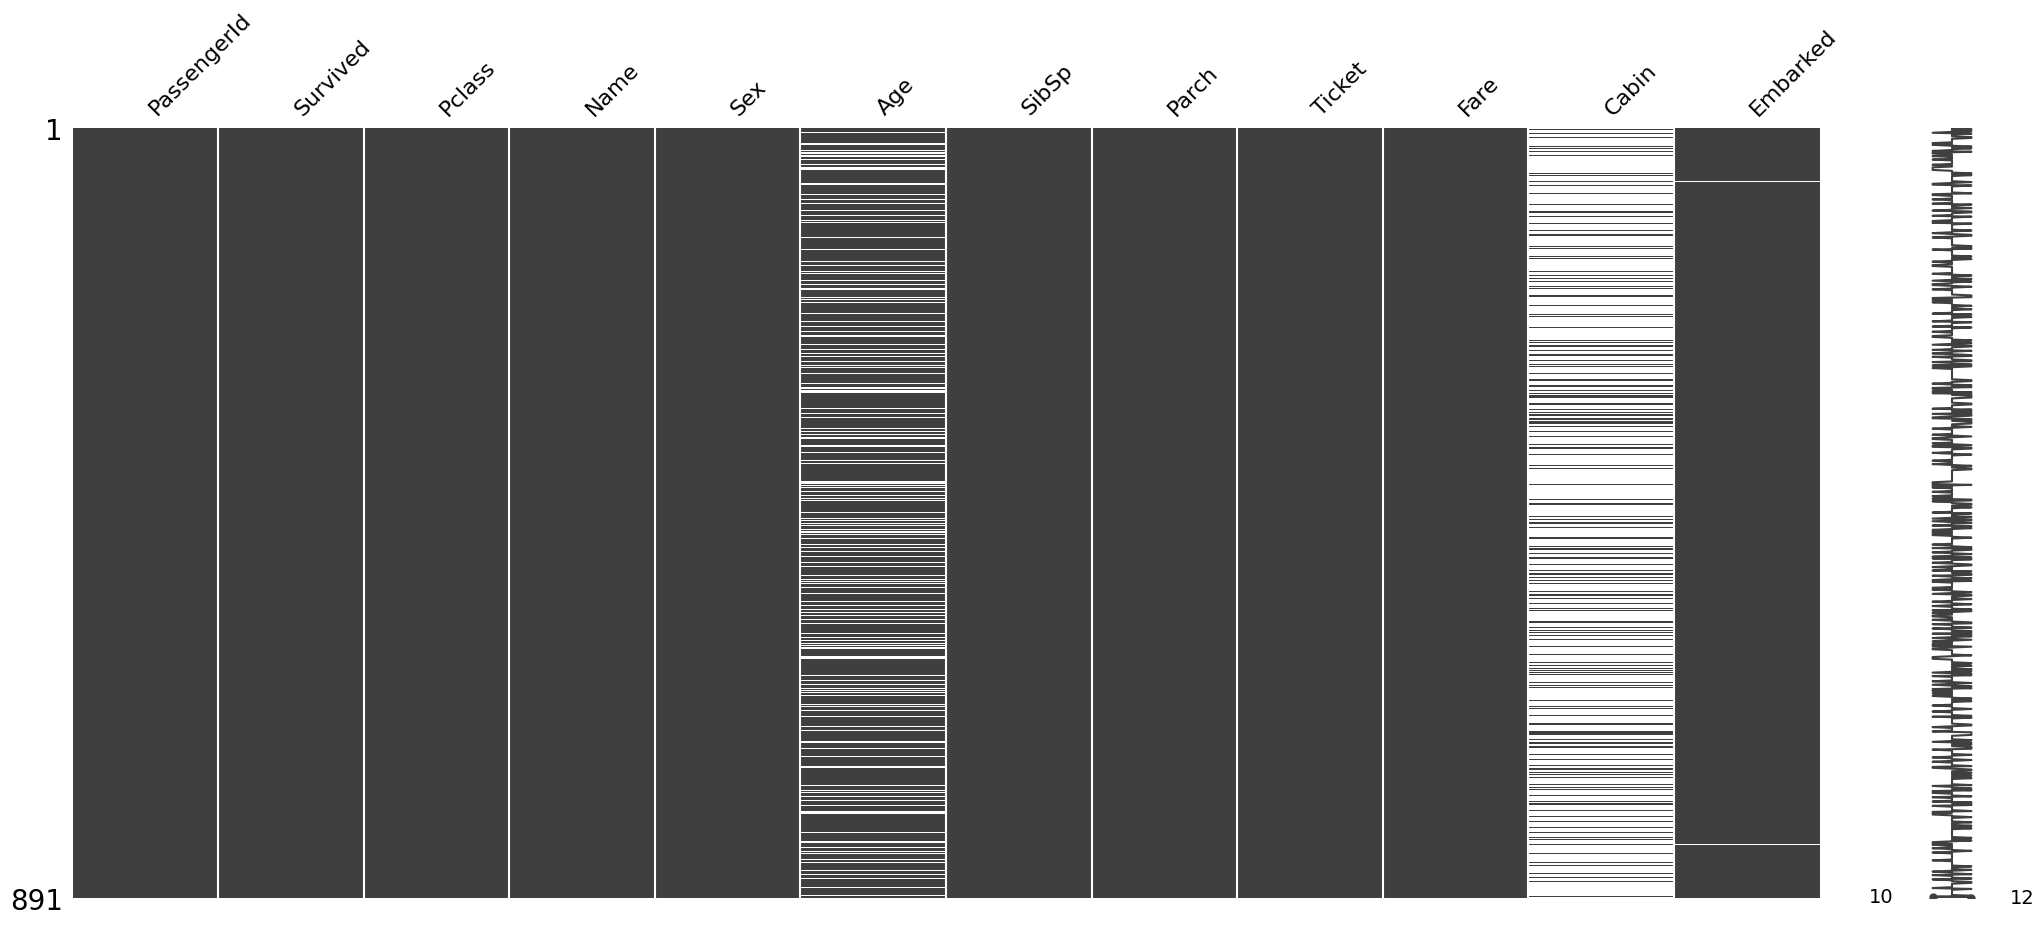

In [7]:
# Illustration of missing values
missingno.matrix(titanic_df)

In [8]:
# Inputing missing values for 'Age' with the median
inserting_age = SimpleImputer(strategy='median')
titanic_df['Age'] = inserting_age.fit_transform(titanic_df[['Age']])

# Inputing missing values for 'Embarked' with the mode
embarked_mode = titanic_df['Embarked'].mode()[0]
titanic_df.fillna({'Embarked': embarked_mode}, inplace=True)

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
# Dropping unnecessary columns
titanic_df.drop(['PassengerId', 'Name', 'Cabin','Ticket'], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
# Checking for duplicates
titanic_df.duplicated().sum()

116

In [11]:
# Removing duplicate
titanic_df.drop_duplicates(inplace=True)
titanic_df.duplicated().sum()

0

In [12]:
# Identifying categorical columns
categorical_columns = titanic_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Sex', 'Embarked'], dtype='object')

In [13]:
# One hot encoding for Sex and Embarked columns
one_hot_encoded_data = pd.get_dummies(titanic_df)
one_hot_encoded_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


#### Data Visualisation

<Figure size 1200x400 with 0 Axes>

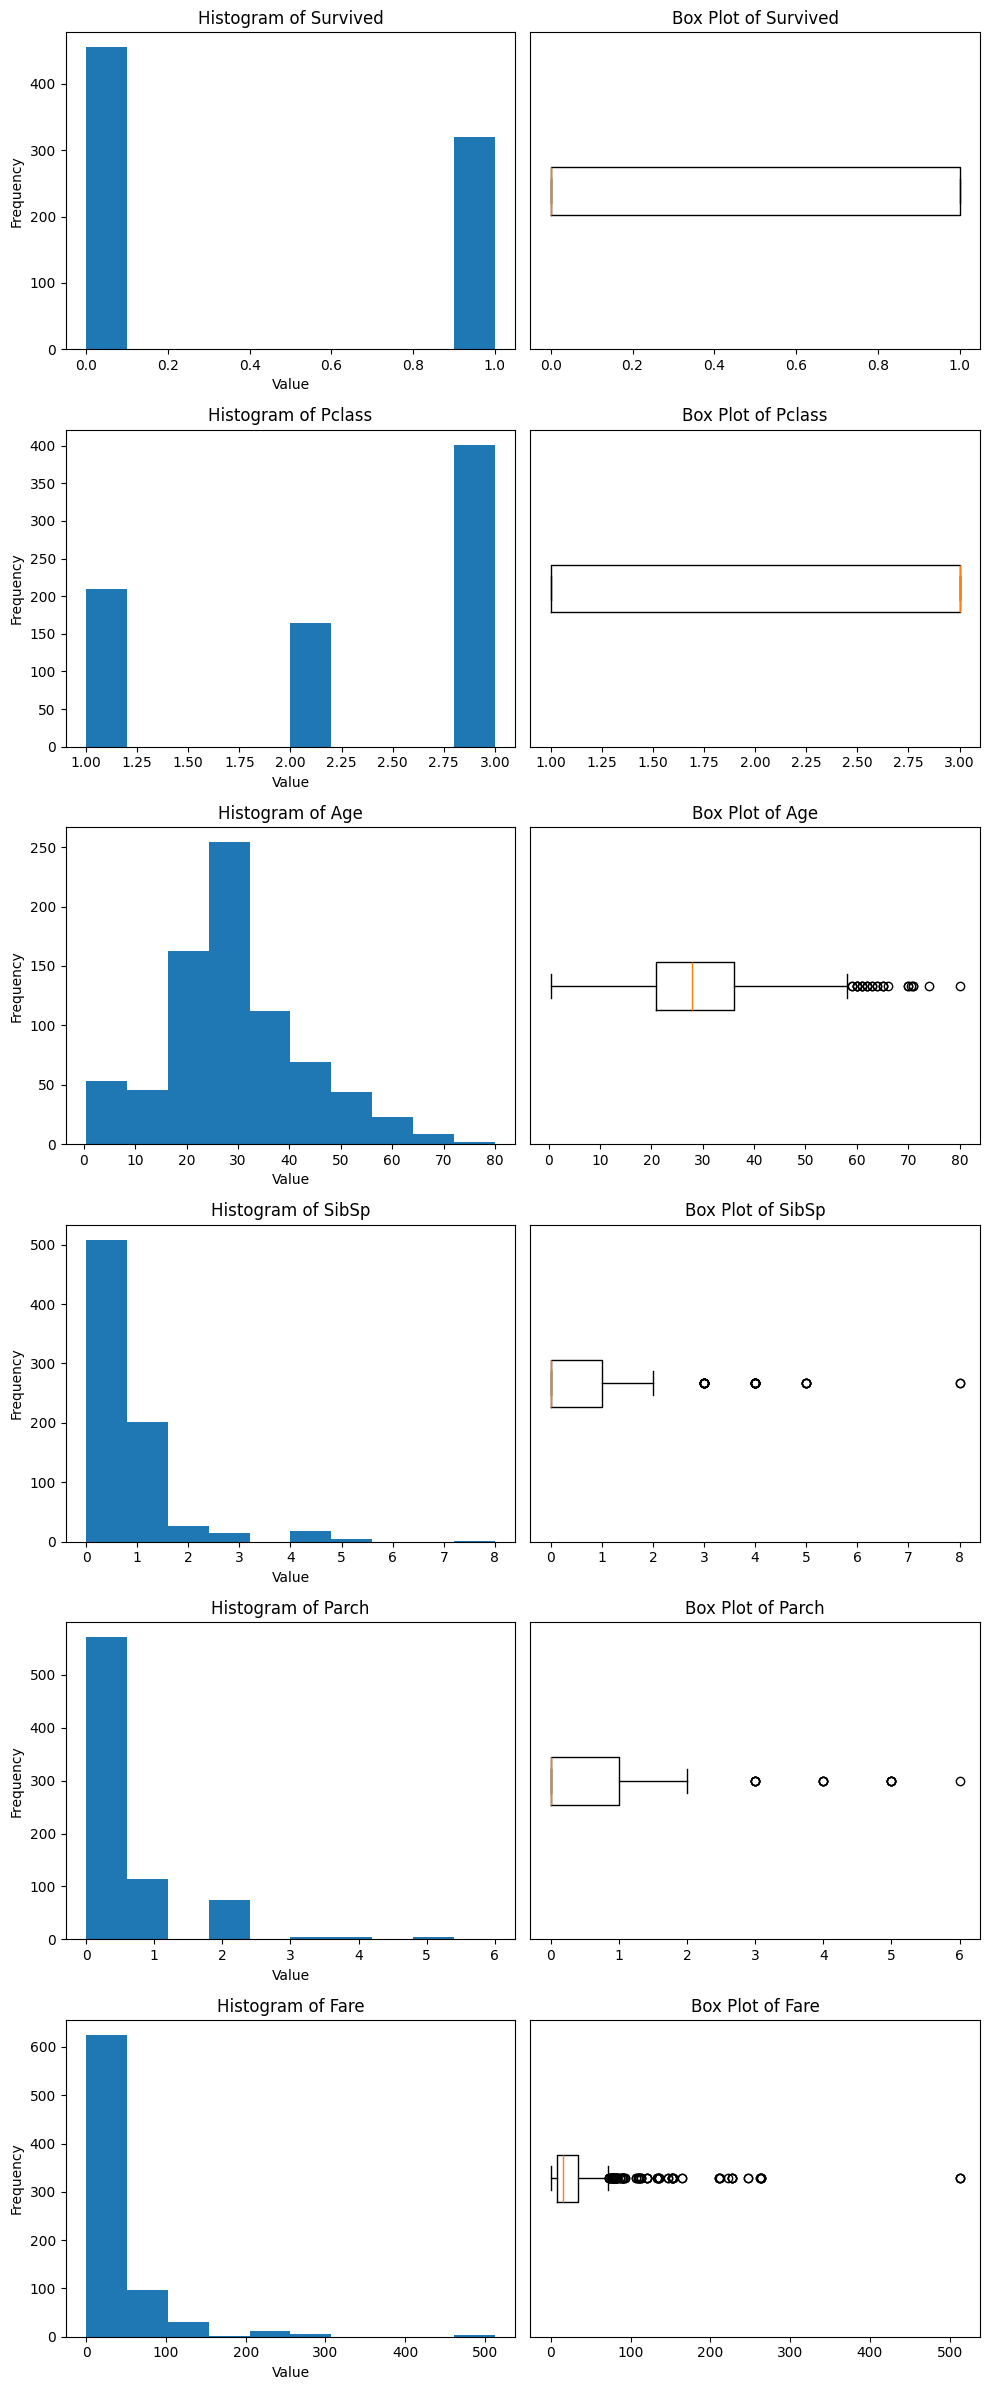

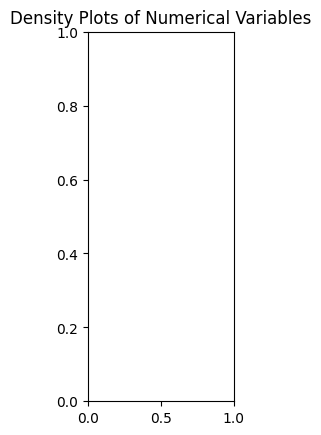

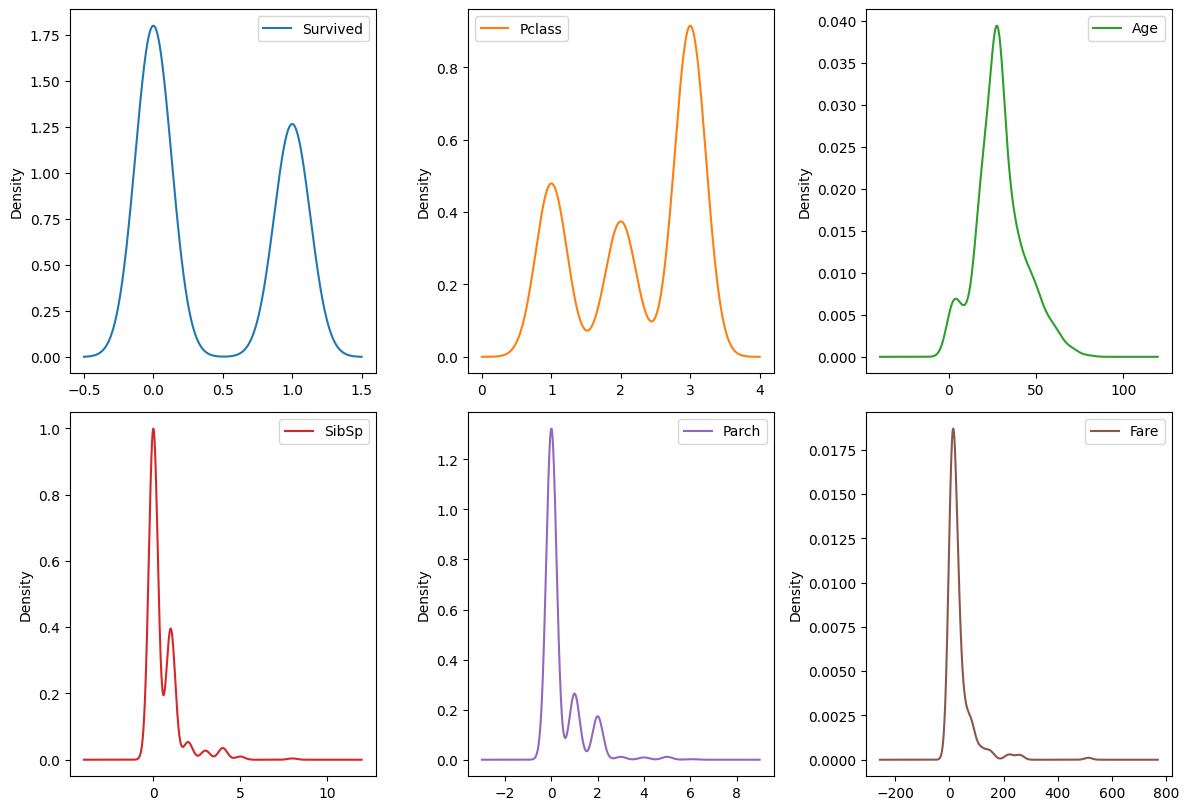

In [14]:
# Creating histograms, box plots, and density plots for numerical variables
plt.figure(figsize = (12, 4))

# Getting numerical features.
numerical_features = one_hot_encoded_data.select_dtypes(include=[np.number]).columns

# Creating a figure and axes with subplots.
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(10, 4*len(numerical_features))) 

for i, feature in enumerate(numerical_features):
    # Plotting histogram on the left (column 0).
    axes[i, 0].hist(one_hot_encoded_data[feature])
    axes[i, 0].set_title(f'Histogram of {feature}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Plotting box plot on the right (column 1).
    axes[i, 1].boxplot(one_hot_encoded_data[feature], vert = False)
    axes[i, 1].set_title(f'Box Plot of {feature}')
    axes[i, 1].set_yticks([]) 

plt.tight_layout()
plt.show()
plt.subplot(1, 3, 3)
plt.title('Density Plots of Numerical Variables')
one_hot_encoded_data.plot(
    kind = 'density', 
    subplots=True, layout = (3, 3), sharex=False, figsize=(12, 12)
)
plt.xlabel('Value')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

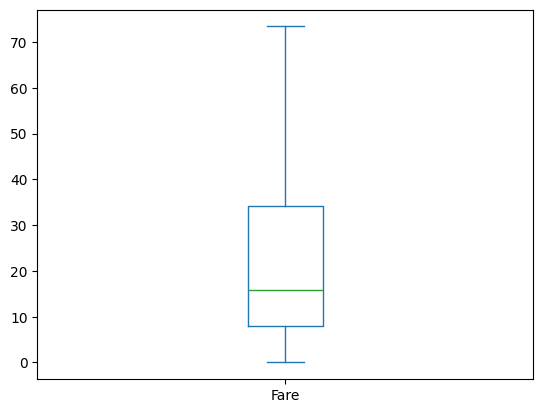

In [15]:
# Handling outliers in Fare.
Q1 = one_hot_encoded_data['Fare'].quantile(0.25)
Q3 = one_hot_encoded_data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

one_hot_encoded_data['Fare'] = np.where(one_hot_encoded_data['Fare'] < lower_bound, lower_bound, one_hot_encoded_data['Fare'])
one_hot_encoded_data['Fare'] = np.where(one_hot_encoded_data['Fare'] > upper_bound, upper_bound, one_hot_encoded_data['Fare'])

one_hot_encoded_data['Fare'].plot(kind='box')
plt.show()

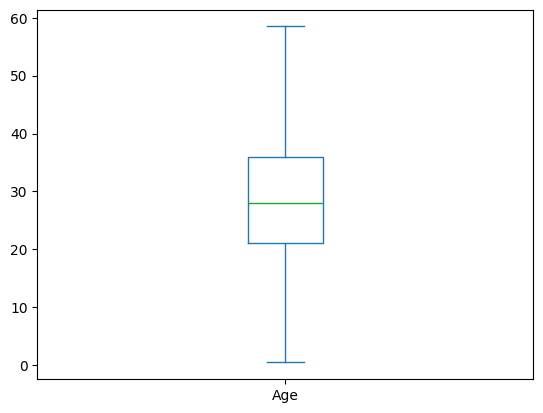

In [16]:
# Handling outliers in Age.
Q1 = one_hot_encoded_data['Age'].quantile(0.25)
Q3 = one_hot_encoded_data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

one_hot_encoded_data['Age'] = np.where(one_hot_encoded_data['Age'] < lower_bound, lower_bound, one_hot_encoded_data['Age'])
one_hot_encoded_data['Age'] = np.where(one_hot_encoded_data['Age'] > upper_bound, upper_bound, one_hot_encoded_data['Age'])

one_hot_encoded_data['Age'].plot(kind='box')
plt.show()


#### Visualising the distribution of key variables

Text(0.5, 1.0, 'Age Distribution')

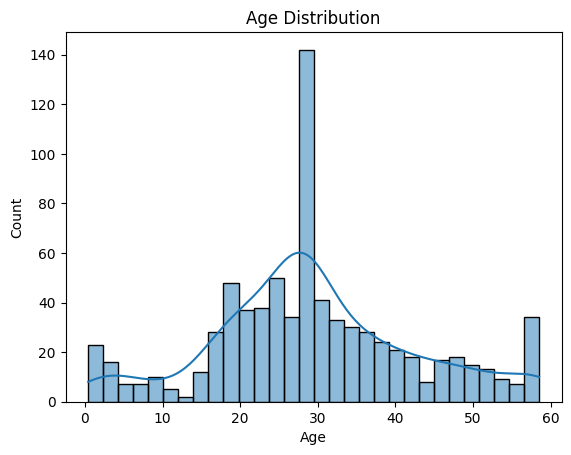

In [17]:
# Histogram of Age
sns.histplot(one_hot_encoded_data['Age'], bins=30, kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Survival Count')

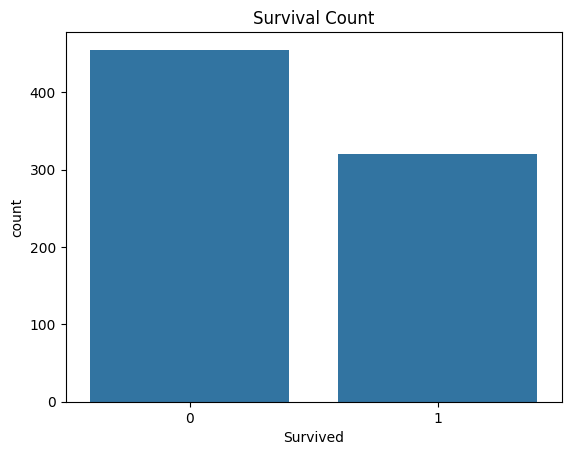

In [18]:
# Bar plot of Survival Count
sns.countplot(x='Survived', data=one_hot_encoded_data)
plt.title('Survival Count')

Text(0.5, 1.0, 'Passenger Class Distribution')

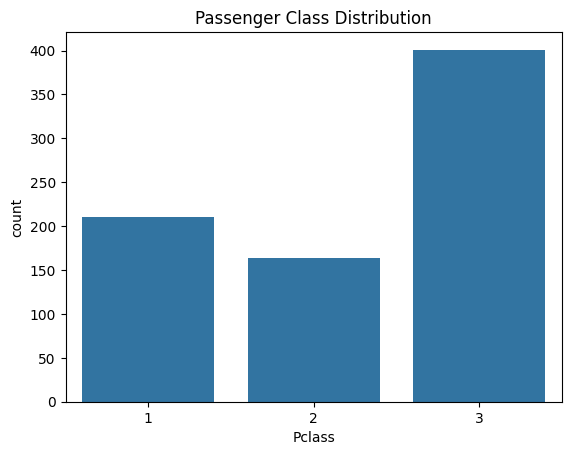

In [19]:
# Bar plot of Passenger Class
sns.countplot(x='Pclass', data=one_hot_encoded_data)
plt.title('Passenger Class Distribution')

Text(0.5, 1.0, 'Fare Distribution')

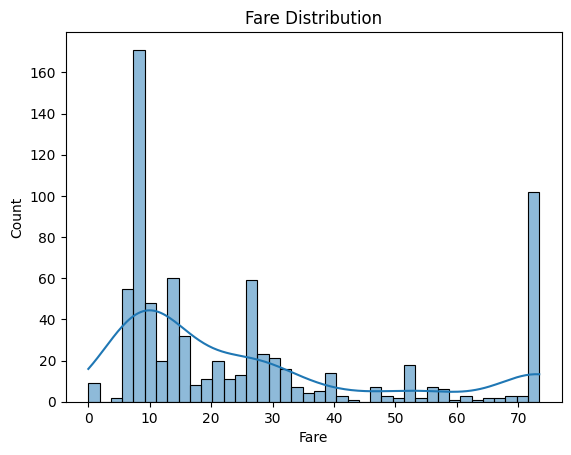

In [20]:
# Histogram of Fare
sns.histplot(one_hot_encoded_data['Fare'], bins=40, kde=True)
plt.title('Fare Distribution')

##### Visualising the relationships between Survival and other variables

<Axes: >

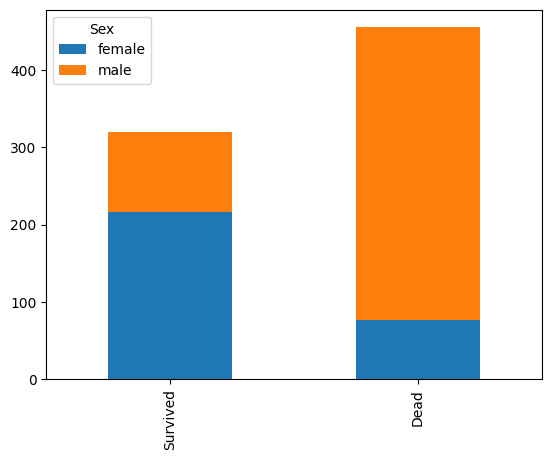

In [21]:
# Survival by Sex
sex_survived = titanic_df[titanic_df["Survived"]==1]["Sex"].value_counts()
sex_dead = titanic_df[titanic_df["Survived"]==0]["Sex"].value_counts()
df_sex = pd.DataFrame([sex_survived,sex_dead])
df_sex.index = ["Survived","Dead"]
df_sex.plot(kind="bar", stacked=True)

The female passengers were more likely to survive. This illustrates that the sex of passengers was important in the survival rate of passengers.

<Axes: xlabel='Survived', ylabel='count'>

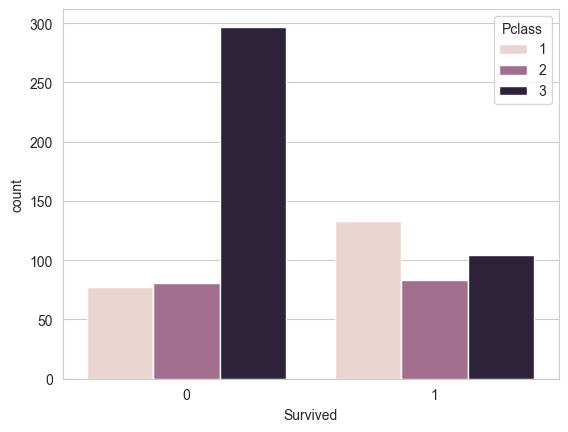

In [22]:
# Visualising Survival by Passenger class
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Pclass", data=one_hot_encoded_data)

The passengers in First Class had the highest chance of surviving. The majority of passengers were from the Third Class but the majority of third class passengers did not survive. This indicates that Passenger Class was an important factor in the survival rate of passengers.

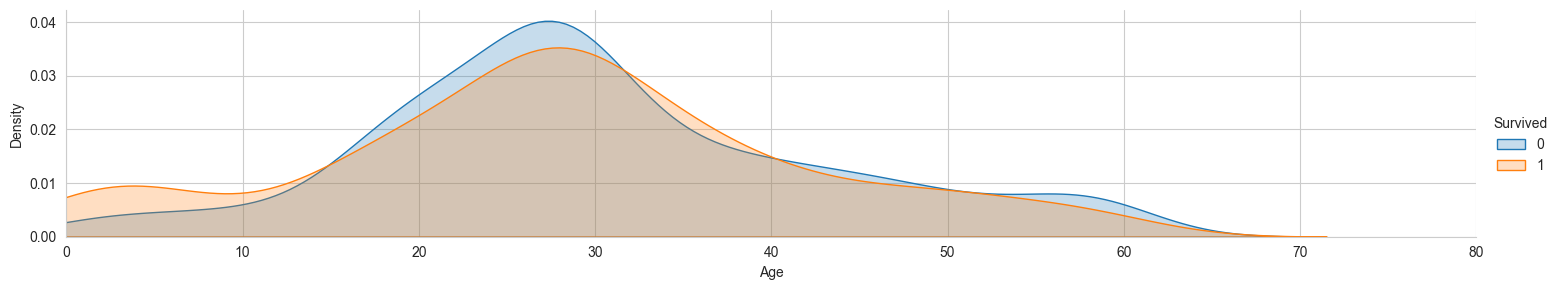

In [23]:
# Visualising Survival according to Age
fac = sns.FacetGrid(one_hot_encoded_data, hue="Survived", aspect=5)
fac.map(sns.kdeplot,'Age',fill=True)
fac.set(xlim=(0,titanic_df["Age"].max()))
fac.add_legend()

Passengers aged between 0-15 were more likely to survive than die.
Passengers aged between 15-30 were more likely to die than survive.
Passengers aged between 30-40 were more likely to survive than die.
Passengers aged between 40-60 had even chance of survival.
Passengers over 60 were more likely to die.

Young adults had the lowest probability of survival compared to children and older adults.

<Axes: xlabel='Survived', ylabel='Fare'>

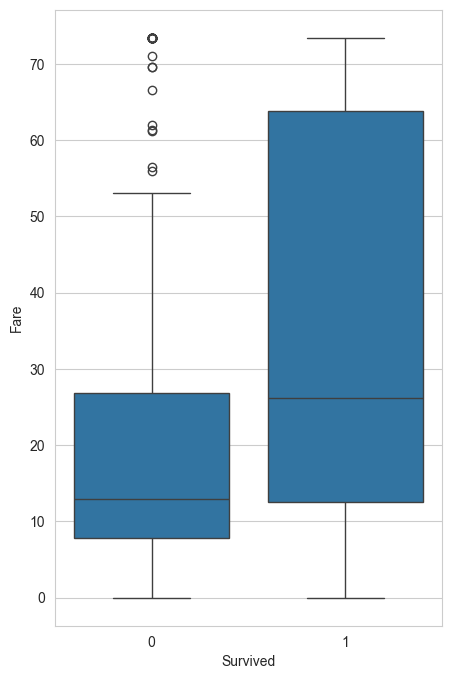

In [24]:
# Visualising survival according to fare price
plt.figure(figsize=(5,8))
sns.boxplot(x="Survived", y="Fare", data=one_hot_encoded_data)

On average, passengers who spent more money on a ticket had a higher chance of survival. Lower priced tickets were likely to be bought by Second and Third Class passengers. This iterates that Passenger class is an important factor in the passenger survival rate.

<Axes: xlabel='Family_Size', ylabel='count'>

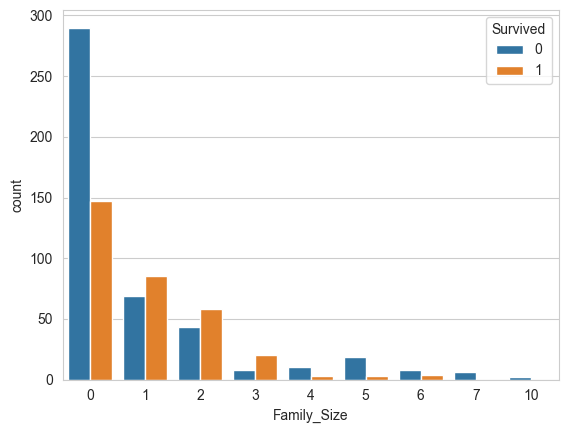

In [25]:
# Visualising survival according to amount of family members
titanic_df['Family_Size'] = titanic_df['SibSp'] + titanic_df['Parch']
sns.countplot(x="Family_Size", hue="Survived", data=titanic_df)

Passengers who had 1-3 family members had higher chances of survival than passengers that were alone or had 4+ family members with them. 

#### Correlation analysis

In [26]:
# Calculating the correlation matrix for numerical variables.
corr_matrix = one_hot_encoded_data.corr()
print(corr_matrix)

            Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.331388 -0.075582 -0.037841  0.069864  0.306633   
Pclass     -0.331388  1.000000 -0.345319  0.087050  0.038998 -0.741242   
Age        -0.075582 -0.345319  1.000000 -0.284784 -0.187100  0.147240   
SibSp      -0.037841  0.087050 -0.284784  1.000000  0.379535  0.263081   
Parch       0.069864  0.038998 -0.187100  0.379535  1.000000  0.238917   
Fare        0.306633 -0.741242  0.147240  0.263081  0.238917  1.000000   
Sex_female  0.516121 -0.118507 -0.087485  0.095574  0.235116  0.219941   
Sex_male   -0.516121  0.118507  0.087485 -0.095574 -0.235116 -0.219941   
Embarked_C  0.170346 -0.250343  0.036987 -0.065188 -0.023809  0.281643   
Embarked_Q -0.039325  0.211009 -0.035306 -0.003388 -0.066534 -0.155332   
Embarked_S -0.129450  0.099935 -0.012330  0.060405  0.060548 -0.160796   

            Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
Survived      0.516121 -0.516121    0.17

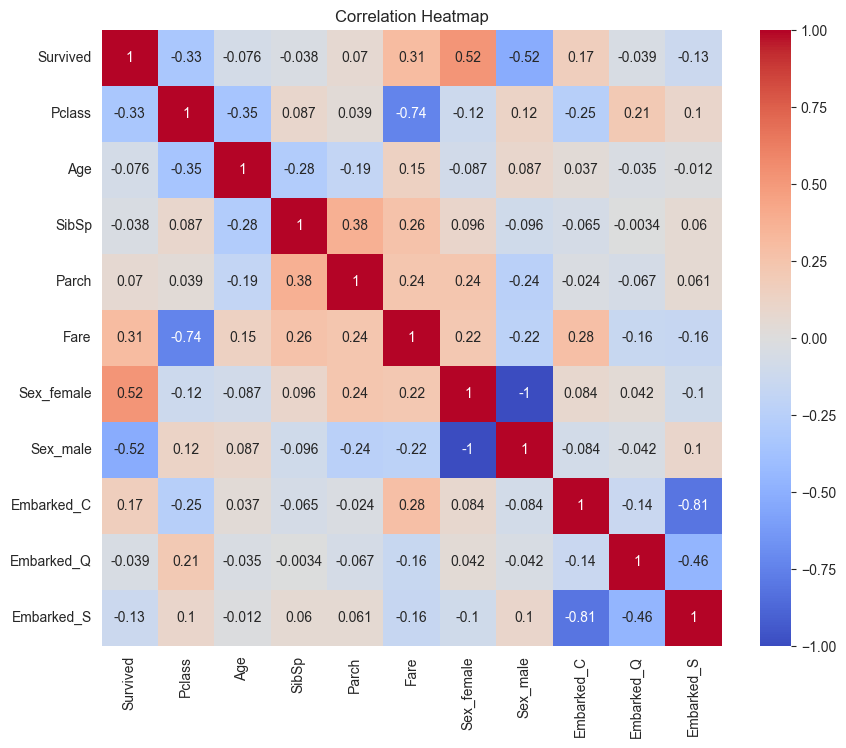

In [27]:
# Visualising the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [28]:
# Import further libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

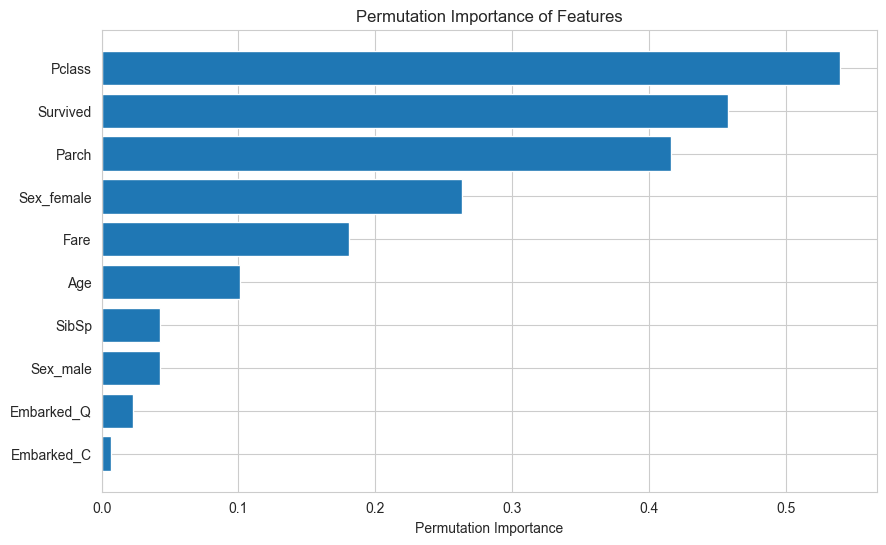

In [29]:
# InitialiSe Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(one_hot_encoded_data.drop('Survived', axis=1), one_hot_encoded_data['Survived'])

# Calculate permutation importance
perm_importance = permutation_importance(rf, one_hot_encoded_data.drop('Survived', axis=1),
                                          one_hot_encoded_data['Survived'], n_repeats=10, random_state=42)

# Visualise permutation importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(one_hot_encoded_data.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance of Features")
plt.show()

**What is the most important factor in determining survival of the Titanic
incident?**

The Passenger Class is the most important feature in predicting survival rate.

**In the movie, the upper-class passengers were given preference on
lifeboats. Does this show in the data?**

First Class passengers had the highest survival rate which supports the idea that they were given preference on lifeboats.

**“Women and children first”. Was this the case?**

Women were more likely to survive than men and children were more likely to survive than adults. This supports the idea that women and children were allowed on first

**Another obsevartion**

Passengers who were travelling alone or with 4+ family members had lower chances of survival than smaller sized families.